#  TWITTER SENTIMENT ANALYSIS ON COVID-19 IN MALAYSIA  

**Install library**

In [1]:
pip install matplotlib

**Import library**

In [2]:
--
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

**Authentication key from Twitter**

In [3]:
# Authentication
#consumerKey = "joRXs4gsNXliJb0aOCqTuF2Pa"
#consumerSecret = "1J8YpCxynexiyW0ygZo9ClETAelqklOYPOCAjNxkLcAwrmRyIv"
#accessToken = "832914904281608192-JYCITkWVwxI4jXKPiSz0dLI5pSKp6vU"
#accessTokenSecret = "152Ew3LbgPve6T72bQ2Zj0FcdMufMJz5zlQtr6uAlP6zi"

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
#auth.set_access_token(accessToken, accessTokenSecret)
#api = tweepy.API(auth, wait_on_rate_limit=True)

**Search keyword and number of tweet**

In [4]:
# extract 5000 tweets

#search_term = 'covid Malaysia'
#tweet_amount = 5000

#tweets = tweepy.Cursor(api.search, q=search_term, lang='en').items(tweet_amount)
#user_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]


#i=1
#for tweet in tweets:
 # print(str(i) + ') '+ tweet.text + '\n')
  #print(tweet.full_text)
  #i = i+1


In [5]:
# list user, location and tweets 
#df = pd.DataFrame(data=user_locs, columns=['user', 'location', 'tweets'])
df=pd.read_csv('/content/Sentiment_Analysis.csv')

pd.set_option('display.max_colwidth' ,1000)

#df.to_csv (r'C:\Users\hazim\OneDrive\Desktop\AI\PROJECT\Sentiment_Analysis.csv', index = False, header=True)

df

,user,location,tweets
0,M_Wayne_Brown,"Bangkok, Thailand","RT @BangkokPostNews: Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…"
1,JoshLee75167117,"Damansara, Selangor",@thevibesnews @malaysia_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision
2,TerryDieHeiden,Hell ️‍🔥,@farysafiqahs In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia… https://t.co/POS8mUwRb1
3,COVID_19Disease,NaN,"#Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government… https://t.co/RhgcRfwdBK"
4,bsindia,India,"#Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister… https://t.co/glGYB6fp9M"
...,...,...,...
4995,awan_biru89,Kuala Lumpur,"RT @Soya_Cincau: Malaysia will allow COVID-19 vaccines to be sold via the private market soon. Khairy said, ""If you want to go fast, you pa…"
4996,syedalaqib,NaN,"RT @malaymail: JKJAV: Covid-19 vaccine administration above 250,000-mark for three days in a row https://t.co/rt6pxYvklH"
4997,broz6969,NaN,RT @malaysiakini: MP SPEAKS | Malaysia will never win the war against Covid-19 if… https://t.co/115usvcOUl
4998,jasze36,Malaysia,"RT @malaymail: JKJAV: Covid-19 vaccine administration above 250,000-mark for three days in a row https://t.co/rt6pxYvklH"


In [6]:
# drop any duplicate tweets
#df = df.drop_duplicates (['tweets'])
#df

In [7]:
# clean text from any username, RT, punctuation and url

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#','', text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','', text)
  text = re.sub(r':+', '', text)
  text = re.sub(r'\n', '', text)

  return text

df['tweets']= df['tweets'].apply(cleanTxt)

df

,user,location,tweets
0,M_Wayne_Brown,"Bangkok, Thailand","Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…"
1,JoshLee75167117,"Damansara, Selangor",_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision
2,TerryDieHeiden,Hell ️‍🔥,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…
3,COVID_19Disease,NaN,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…"
4,bsindia,India,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…"
...,...,...,...
4995,awan_biru89,Kuala Lumpur,"_Cincau Malaysia will allow COVID-19 vaccines to be sold via the private market soon. Khairy said, ""If you want to go fast, you pa…"
4996,syedalaqib,NaN,"JKJAV Covid-19 vaccine administration above 250,000-mark for three days in a row"
4997,broz6969,NaN,MP SPEAKS | Malaysia will never win the war against Covid-19 if…
4998,jasze36,Malaysia,"JKJAV Covid-19 vaccine administration above 250,000-mark for three days in a row"


In [8]:
# drop any duplicate tweets
df = df.drop_duplicates (['tweets'])
df

,user,location,tweets
0,M_Wayne_Brown,"Bangkok, Thailand","Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…"
1,JoshLee75167117,"Damansara, Selangor",_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision
2,TerryDieHeiden,Hell ️‍🔥,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…
3,COVID_19Disease,NaN,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…"
4,bsindia,India,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…"
...,...,...,...
4980,malaymail,Malaysia,"Nearly 110,000 receive first Covid jab as vaccination gathers pace in Sibu"
4987,LowElsielow,NaN,PN will ruin Malaysia before Covid does.KerajaanGagal
4988,codebluenews,Kuala Lumpur,"Malaysia achieved a daily high record of 268,604 Covid-19 doses administered nationwide on 24 June.Malaysia reach…"
4993,NewsBFM,Kuala Lumpur,"Federal Territories Minister Annuar Musa says people are seemingly unafraid of Covid-19, which he believes is an in…"


In [9]:
# List out the polarity and subjectivity of each tweets

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df

,user,location,tweets,Subjectivity,Polarity
0,M_Wayne_Brown,"Bangkok, Thailand","Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…",0.000000,0.0000
1,JoshLee75167117,"Damansara, Selangor",_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,0.350000,-0.0875
2,TerryDieHeiden,Hell ️‍🔥,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,0.437500,0.1875
3,COVID_19Disease,NaN,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…",0.000000,0.0000
4,bsindia,India,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…",0.450000,0.0000
...,...,...,...,...,...
4980,malaymail,Malaysia,"Nearly 110,000 receive first Covid jab as vaccination gathers pace in Sibu",0.366667,0.1750
4987,LowElsielow,NaN,PN will ruin Malaysia before Covid does.KerajaanGagal,0.000000,0.0000
4988,codebluenews,Kuala Lumpur,"Malaysia achieved a daily high record of 268,604 Covid-19 doses administered nationwide on 24 June.Malaysia reach…",0.270000,0.0800
4993,NewsBFM,Kuala Lumpur,"Federal Territories Minister Annuar Musa says people are seemingly unafraid of Covid-19, which he believes is an in…",0.000000,0.0000


**Understanding the common words used in the tweets**

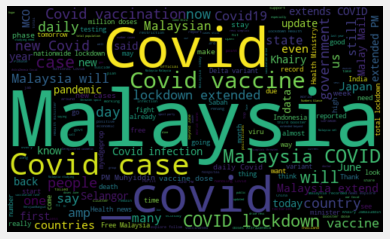

In [10]:
# Plot WordCloud
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# Negative, Positive, Neutral analysis

def getAnalaysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Sentiments'] =df['Polarity'].apply(getAnalaysis)

df

,user,location,tweets,Subjectivity,Polarity,Sentiments
0,M_Wayne_Brown,"Bangkok, Thailand","Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…",0.000000,0.0000,Neutral
1,JoshLee75167117,"Damansara, Selangor",_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,0.350000,-0.0875,Negative
2,TerryDieHeiden,Hell ️‍🔥,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,0.437500,0.1875,Positive
3,COVID_19Disease,NaN,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…",0.000000,0.0000,Neutral
4,bsindia,India,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…",0.450000,0.0000,Neutral
...,...,...,...,...,...,...
4980,malaymail,Malaysia,"Nearly 110,000 receive first Covid jab as vaccination gathers pace in Sibu",0.366667,0.1750,Positive
4987,LowElsielow,NaN,PN will ruin Malaysia before Covid does.KerajaanGagal,0.000000,0.0000,Neutral
4988,codebluenews,Kuala Lumpur,"Malaysia achieved a daily high record of 268,604 Covid-19 doses administered nationwide on 24 June.Malaysia reach…",0.270000,0.0800,Positive
4993,NewsBFM,Kuala Lumpur,"Federal Territories Minister Annuar Musa says people are seemingly unafraid of Covid-19, which he believes is an in…",0.000000,0.0000,Neutral


In [12]:
df['Sentiments'].value_counts()

Neutral     570
Positive    450
Negative    235
Name: Sentiments, dtype: int64

In [13]:
# Print all of the positive tweets
df[df['Sentiments']=='Positive']

,user,location,tweets,Subjectivity,Polarity,Sentiments
2,TerryDieHeiden,Hell ️‍🔥,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,0.437500,0.187500,Positive
6,FiqhTabayyun,"Kuantan, Pahang","Adopt ‘jab first, register later’ approach to flatten Malaysia’s Covid-19 curve, govt told👍👍👍👍👍👍👍👍👍👍",0.166667,0.125000,Positive
7,AlfonsoTheOne,NaN,"Adopt ‘jab first, register later’ approach to flatten Malaysia’s Covid-19 curve, govt told👍👍👍👍👍👍👍👍👍👍",0.166667,0.125000,Positive
12,saroki19,Malaysia,Selangor has the highest covid-19 cases. Logically you should allocate more vaccine to selangor. You put out the ma…,0.375000,0.375000,Positive
20,SAMLgk1,NaN,_covid Is it true the vaccination center in POLIMAS Jitra is closed for 6 days due to vaccine stock shortage?,0.306250,0.006250,Positive
...,...,...,...,...,...,...
4934,myprop9,NaN,"Sir, you r the most modern thinking MP thus pls support the immediate opening of economic activities an…",0.333333,0.300000,Positive
4970,sauronmymaster,Singapore,My closest cousin from Malaysia is COVID-19 positive. 😭,0.545455,0.227273,Positive
4979,Zicutake,NaN,"Most vulnerable may need annual Covid boosters, says WHO - Free Malaysia Today",0.600000,0.133333,Positive
4980,malaymail,Malaysia,"Nearly 110,000 receive first Covid jab as vaccination gathers pace in Sibu",0.366667,0.175000,Positive


In [14]:
# print all of the negative tweets
df[df['Sentiments']=='Negative']

,user,location,tweets,Subjectivity,Polarity,Sentiments
1,JoshLee75167117,"Damansara, Selangor",_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,0.350000,-0.087500,Negative
19,syahiirimran,Malaysia,I just realised that next sem is my last year already. LIKE WTF IS HAPPENING RN. I’M NOT PAYING THE UNI AND GRADUAT…,0.355556,-0.166667,Negative
25,ernamh,"Kuala Lumpur, Malaysia",_pat91 Maybe Google. It's already in the papers what they're doing or at least trying 🙄 Sabah has to defer…,0.400000,-0.300000,Negative
27,zhuge8f,Malaysia,_radarsaham World Bank has cut its forecast on Malaysia's GDP from 6.9% to 4.5% due to resurgence in Covid 19 infections &amp; slower…,0.375000,-0.125000,Negative
32,suzensubadar,Somewhere Over the Rainbow,Been reading stories that some people have paid to get vaccinated. I know we are all desperate but no one should pay for or…,1.000000,-0.600000,Negative
...,...,...,...,...,...,...
4888,wasabi1388,NaN,It's very2 inhumane of the FT menteli to say Malaysia is successful in fighting the war against Covid-19 w…,0.925000,-0.075000,Negative
4900,wasabi1388,NaN,It's very2 inhumane of the FT menteli to say Malaysia is successful in fighting the war against Covid…,0.925000,-0.075000,Negative
4942,zainisaari,malaysia,"The virus will be with us for a long, long time. Booster shots after 2 years. For Malaysia, that's 78 million doses…",0.400000,-0.050000,Negative
4966,FocusMalaysiaMY,Malaysia,Malaysian equities endured another down day as market conditions remain frail after the World Bank trimmed the coun…,0.288889,-0.155556,Negative


In [15]:
# Get percentage of positive tweets
ptweets = df[df.Sentiments == 'Positive']
ptweets = ptweets['tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

35.9

In [16]:
# Get percentage of negative tweets
ntweets = df[df.Sentiments == 'Negative']
ntweets = ntweets['tweets']

round( (ntweets.shape[0] / df.shape[0]) *100, 1)

18.7

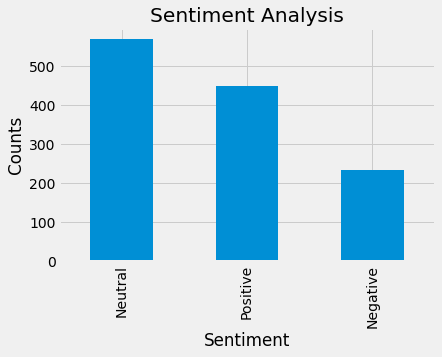

In [17]:
# Show value count
df['Sentiments'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiments'].value_counts().plot(kind='bar')
plt.show()

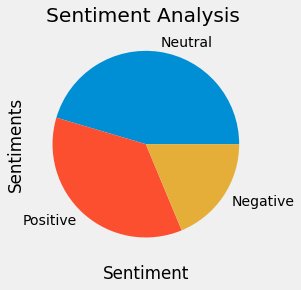

In [18]:
# show value count
df['Sentiments'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis ')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiments'].value_counts().plot(kind='pie')
plt.show()

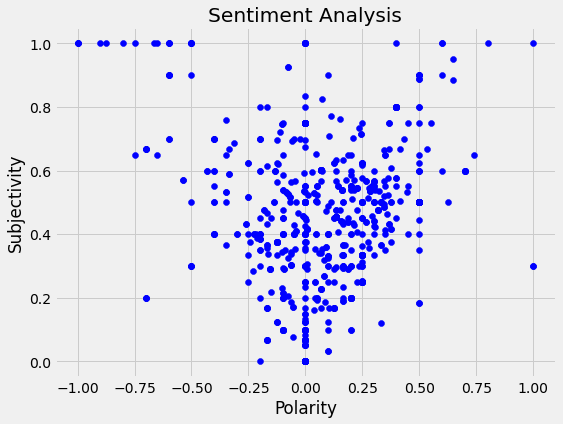

In [19]:
# Plot polarity and subjectivity
plt.figure(figsize=(8,6))

plt.scatter(df['Polarity'],df['Subjectivity'], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Extracting features from cleaned tweets

In [20]:
new_df = df[['tweets','Sentiments']]
new_df.head()

,tweets,Sentiments
0,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…",Neutral
1,_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,Negative
2,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,Positive
3,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…",Neutral
4,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…",Neutral


**Removing stopwords**

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [23]:
new_df['tweets'].apply(lambda x: [item for item in x if item not in stop])

0                               [ , M, l, ',  , n, n, w, e,  , l, c, k, w, n,  , h,  , w,  , c, h, e, u, l, e,  ,  , e, x, p, r, e,  , M, n,  ,  , b, e, n, g,  , e, x, e, n, e,  , n, e, f, n, e, l, ,,  , h, e,  , g, v, e, r, n, e, n,  , h, …]
1                                                                   [ , _, c, v,  , I,  , r, e, l, l,  , w, h,  , f, r,  , S, b, h,  , g, n,  , n, h, e, r,  , h, u, n,  , c, l, u, e, r,  , f, r, h, c, n, g, .,  , W, h,  ,  , u, b,  , e, c, n]
2                                                    [ , I, n,  , r, e, l, n,  ,  , c, v,  , k, e, ., .,  , k, l, u,  , c, v,  , u,  , l,  , f,  , h, e, r,  , c, u, n, r, e,  , r, e,  , h, n, l, n, g,  ,  , b, e, e, r,  , h, n,  , M, l, …,  ]
3                                     [M, l, ',  , n, n, w, e,  , l, c, k, w, n,  , h,  , w,  , c, h, e, u, l, e,  ,  , e, x, p, r, e,  , M, n,  ,  , b, e, n, g,  , e, x, e, n, e,  , n, e, f, n, e, l, ,,  , h, e,  , g, v, e, r, n, e, n, …,  ]
4                           

In [24]:
new_df.head(6)

,tweets,Sentiments
0,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…",Neutral
1,_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,Negative
2,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,Positive
3,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…",Neutral
4,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…",Neutral
5,"The Delta variant, which was detected in Malaysia recently, has caused a surge in cases in Kudus within a week. FMTNews http…",Neutral


In [25]:
new_df['Sentiments'].value_counts()

Neutral     570
Positive    450
Negative    235
Name: Sentiments, dtype: int64

# **LOGISTIC REGRESSION (MULTICLASS CLASSIFICATION)**

**Split train and test dataset**

In [26]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiments.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (1004, 2)
valid shape :  (251, 2)


# Use Of Counter Vectorizer For Multi Class Classification

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.tweets.values)
X_valid = vectorizer.transform(valid.tweets.values)

y_train = train.Sentiments.values
y_valid = valid.Sentiments.values

print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (1004, 3067)
X_valid.shape :  (251, 3067)
y_train.shape :  (1004,)
y_valid.shape :  (251,)


# Logistic Regression(For Multiclass Classification)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
number_itter=logreg.n_iter_
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print("Number of Iteration : ", number_itter)
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.99800796812749
Validation accuracy Score :  0.852589641434263
Number of Iteration :  [60]
              precision    recall  f1-score   support

    Negative       0.77      0.90      0.83        40
     Neutral       0.92      0.81      0.86       130
    Positive       0.81      0.90      0.85        81

    accuracy                           0.85       251
   macro avg       0.83      0.87      0.85       251
weighted avg       0.86      0.85      0.85       251



# CONVERTING MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION

In [29]:
new_df.head()

,tweets,Sentiments
0,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…",Neutral
1,_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,Negative
2,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,Positive
3,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…",Neutral
4,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…",Neutral


In [30]:
new_df.shape

(1255, 2)

In [31]:
log_reg = new_df[['tweets','Sentiments']]

In [32]:
log_reg.head()

,tweets,Sentiments
0,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…",Neutral
1,_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,Negative
2,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,Positive
3,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…",Neutral
4,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…",Neutral


In [33]:
log_reg["Sentiments"]= log_reg["Sentiments"].replace('Positive',1) 
log_reg["Sentiments"]= log_reg["Sentiments"].replace('Neutral',1) 
log_reg["Sentiments"]= log_reg["Sentiments"].replace('Negative',0) 
 

In [34]:
log_reg.head()

,tweets,Sentiments
0,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government has…",1
1,_covid I really wish for Sabah gain another thousands cluster forthcoming. What a dumb decision,0
2,In relation to covid ke.. kalau covid tu alot of other countries are handling it better than Malaysia…,1
3,"Malaysia's nationwide lockdown that was scheduled to expire Monday is being extended indefinitely, the government…",1
4,"Malaysia will extend its current restrictions until the Covid-19 pandemic is further contained, Prime Minister…",1


In [35]:
log_reg['Sentiments'].value_counts()

1    1020
0     235
Name: Sentiments, dtype: int64

In [36]:
X = log_reg.drop('Sentiments', axis=1)
y = log_reg.Sentiments

**Removing stopwords**

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [39]:
log_reg['tweets'].apply(lambda x: [item for item in x if item not in stop])

0                               [ , M, l, ',  , n, n, w, e,  , l, c, k, w, n,  , h,  , w,  , c, h, e, u, l, e,  ,  , e, x, p, r, e,  , M, n,  ,  , b, e, n, g,  , e, x, e, n, e,  , n, e, f, n, e, l, ,,  , h, e,  , g, v, e, r, n, e, n,  , h, …]
1                                                                   [ , _, c, v,  , I,  , r, e, l, l,  , w, h,  , f, r,  , S, b, h,  , g, n,  , n, h, e, r,  , h, u, n,  , c, l, u, e, r,  , f, r, h, c, n, g, .,  , W, h,  ,  , u, b,  , e, c, n]
2                                                    [ , I, n,  , r, e, l, n,  ,  , c, v,  , k, e, ., .,  , k, l, u,  , c, v,  , u,  , l,  , f,  , h, e, r,  , c, u, n, r, e,  , r, e,  , h, n, l, n, g,  ,  , b, e, e, r,  , h, n,  , M, l, …,  ]
3                                     [M, l, ',  , n, n, w, e,  , l, c, k, w, n,  , h,  , w,  , c, h, e, u, l, e,  ,  , e, x, p, r, e,  , M, n,  ,  , b, e, n, g,  , e, x, e, n, e,  , n, e, f, n, e, l, ,,  , h, e,  , g, v, e, r, n, e, n, …,  ]
4                           

# **LOGISTIC REGRESSION (BINARY CLASSIFICATION)**

**Split train and test dataset**

In [40]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(log_reg,test_size = 0.2,random_state=0,stratify = log_reg.Sentiments.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (1004, 2)
valid shape :  (251, 2)


# Use Of Count Vectorizer For Binary Classification

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.tweets.values)
X_valid = vectorizer.transform(valid.tweets.values)

y_train = train.Sentiments.values
y_valid = valid.Sentiments.values

print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (1004, 3012)
X_valid.shape :  (251, 3012)
y_train.shape :  (1004,)
y_valid.shape :  (251,)


# Logistic Regression(For Binary Classification)

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
number_itter=logreg.n_iter_
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print("number of Iteration : ", number_itter)
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9950199203187251
Validation accuracy Score :  0.9123505976095617
number of Iteration :  [29]
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        35
           1       0.98      0.92      0.95       216

    accuracy                           0.91       251
   macro avg       0.81      0.89      0.84       251
weighted avg       0.93      0.91      0.92       251



In [43]:
# Get the predicted classes
train_class_preds = logreg.predict(X_train)
test_class_preds = logreg.predict(X_valid)

[[183   0]
 [  5 816]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

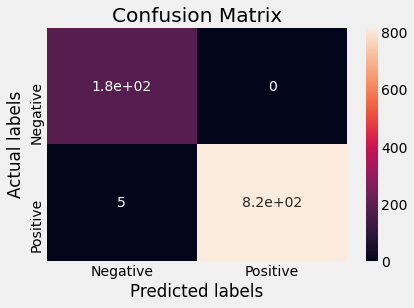

In [44]:
# Get the confusion matrix for train

labels = ['Negative', 'Positive']
cm = confusion_matrix(train_class_preds, y_train )
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[ 30   5]
 [ 17 199]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

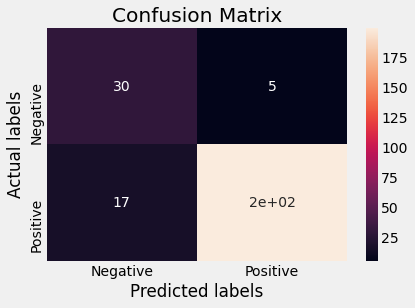

In [45]:
# Get the confusion matrix for test

labels = ['Negative', 'Positive']
cm = confusion_matrix( test_class_preds, y_valid)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [46]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = logreg.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

accuracy is 0.9123505976095617


In [47]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  logreg.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.8396631823461091


In [48]:
# Score is mean accuracy
scikit_score = logreg.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.9123505976095617


In [49]:
TP = 199
FP = 5
# FN (0) and TN (12) are not needed in the formuala!
precision = TP / (TP + FP)
print(f"precision: {precision:4.2f}")

precision: 0.98


In [50]:
TP = 199
FN = 17
# FT (14) and TN (12) are not needed in the formuala!
recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

recall: 0.92
